## test running GVAE on the cora dataset

In [5]:
python = "/home/jeremie/miniconda3/envs/gae/bin/python"
! cd vgae && $python train.py --datasrc dgl --dataset cora # from DGL

[22:26:11] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: /home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/dgl/tensoradapter/pytorch/libtensoradapter_pytorch_1.9.1.so: cannot open shared object file: No such file or directory
Using backend: pytorch
Extracting file to /home/jeremie/.dgl/cora_v2
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.
Total Parameters: 46944
Epoch: 0001 train_loss= 1.76789 train_acc= 0.49980 val_roc= 0.52840 val_ap= 0.51395 time= 0.29602
Epoch: 0002 train_loss= 1.69110 train_acc= 0.49904 val_roc= 0.51230 val_ap= 0.49975 time= 0.24249
Epoch: 0003 train_loss= 1.64070 train_acc= 0.49810 val_roc= 0.50972 val_ap= 0.50664 time= 0.19564
Epoch: 0004 train_loss= 1.50254 train_acc= 0.49730 val_roc= 0.49659 val_ap= 0.52559 time= 0.20460
Epoch: 0005 train_loss= 1

Epoch: 0078 train_loss= 0.61031 train_acc= 0.37636 val_roc= 0.81733 val_ap= 0.82113 time= 0.18910
Epoch: 0079 train_loss= 0.60645 train_acc= 0.37914 val_roc= 0.82071 val_ap= 0.82739 time= 0.19524
Epoch: 0080 train_loss= 0.60374 train_acc= 0.39404 val_roc= 0.81409 val_ap= 0.82148 time= 0.17228
Epoch: 0081 train_loss= 0.60029 train_acc= 0.40424 val_roc= 0.82173 val_ap= 0.82479 time= 0.21642
Epoch: 0082 train_loss= 0.59704 train_acc= 0.42399 val_roc= 0.81857 val_ap= 0.82248 time= 0.19487
Epoch: 0083 train_loss= 0.59455 train_acc= 0.42324 val_roc= 0.81708 val_ap= 0.82162 time= 0.18600
Epoch: 0084 train_loss= 0.59292 train_acc= 0.43047 val_roc= 0.81788 val_ap= 0.82138 time= 0.17112
Epoch: 0085 train_loss= 0.59342 train_acc= 0.44450 val_roc= 0.81343 val_ap= 0.81727 time= 0.18161
Epoch: 0086 train_loss= 0.59265 train_acc= 0.43675 val_roc= 0.81279 val_ap= 0.81954 time= 0.17692
Epoch: 0087 train_loss= 0.59160 train_acc= 0.44356 val_roc= 0.82269 val_ap= 0.82432 time= 0.18474
Epoch: 0088 train_lo

Epoch: 0162 train_loss= 0.51414 train_acc= 0.50081 val_roc= 0.89737 val_ap= 0.89366 time= 0.18473
Epoch: 0163 train_loss= 0.51386 train_acc= 0.49978 val_roc= 0.89807 val_ap= 0.89245 time= 0.17529
Epoch: 0164 train_loss= 0.51365 train_acc= 0.49690 val_roc= 0.90275 val_ap= 0.89766 time= 0.18004
Epoch: 0165 train_loss= 0.51404 train_acc= 0.49819 val_roc= 0.90040 val_ap= 0.89879 time= 0.20815
Epoch: 0166 train_loss= 0.51293 train_acc= 0.50002 val_roc= 0.89906 val_ap= 0.89766 time= 0.16791
Epoch: 0167 train_loss= 0.51290 train_acc= 0.49871 val_roc= 0.90198 val_ap= 0.89781 time= 0.16612
Epoch: 0168 train_loss= 0.51210 train_acc= 0.49766 val_roc= 0.89857 val_ap= 0.89503 time= 0.17205
Epoch: 0169 train_loss= 0.51290 train_acc= 0.49854 val_roc= 0.90083 val_ap= 0.89868 time= 0.17864
Epoch: 0170 train_loss= 0.51146 train_acc= 0.49967 val_roc= 0.89659 val_ap= 0.89454 time= 0.16575
Epoch: 0171 train_loss= 0.51239 train_acc= 0.49957 val_roc= 0.89907 val_ap= 0.89384 time= 0.18828
Epoch: 0172 train_lo

## loading data

In [2]:
from genepy.utils import helper as h

# to comment in your case
from taigapy import TaigaClient
tc = TaigaClient()

from celligner2.dataset import anndata
import pandas as pd
# to comment in your case
from depmapomics import tracker as track
#autoreload
%load_ext autoreload
%autoreload 2
#output
from bokeh.plotting import output_notebook
output_notebook()
from anndata import AnnData

Loading BokehJS ...

In [151]:
# load from taiga public (figshare link)
# load internal expression,
# latest version can be found at https://depmap.org/portal/download/
# can also be loaded like so pd.read_csv('gs://ccle_default_params/celligner_ex/CCLE_expression.csv.gz', index_col=0)
CCLE_expression = tc.get(name='internal-21q3-fe4c',
                         file='CCLE_expression_full')  


# load  TCGA expression
# this dataset was generated from  ,using this script: 
# caan be found here: pd.read_csv('gs://ccle_default_params/celligner_ex/TCGA_expression.csv.gz', index_col=0)
TCGA_expression = tc.get(name='celligner-input-9827',
                       file='tumor_expression')

No dataset version provided. Using version 16.
No dataset version provided. Using version 1.


In [22]:
# loading annotations
CCLE_annotation = track.getTracker() # the function uses pygsheets to load this: REFSHEET_URL=https://docs.google.com/spreadsheets/d/1Pgb5fIClGnErEqzxpU7qqX6ULpGTDjvzWwDN8XUJKIY
# Sheets.from_files(MY_ID, MYSTORAGE_ID).get(REFSHEET_URL).sheets[0].to_frame(index_col=0)
# you can also get it from pd.read_csv('gs://ccle_default_params/celligner_ex/CCLE_annotation.csv.gz', index_col=0)


# can be loaded from 
# pd.read_csv('gs://ccle_default_params/celligner_ex/TCGA_annotation.csv.gz', index_col=0)
TCGA_annotation = tc.get(name='celligner-input-9827',
                         file='tumor_annotations') # generated manually 

No dataset version provided. Using version 1.


In [25]:
CCLE_annotation.columns

Index(['arxspan_id', 'version', 'sm_id', 'PDO', 'datatype', 'size',
       'stripped_cell_line_name', 'participant_id', 'cellosaurus_id',
       'synonyms', 'bam_public_sra_path', 'internal_bam_filepath',
       'internal_bai_filepath', 'legacy_bam_filepath', 'legacy_bai_filepath',
       'parent_cell_line', 'sex', 'matched_normal', 'age', 'stated_race',
       'geo_loc', 'infered_ethnicity', 'ancestry', 'doublingt', 'mut_rate',
       'finding_site', 'collection_site', 'cellosaurus_origin',
       'Primary/Metastasis', 'pathology', 'pathology_subtype',
       'pathology_subtype2', 'pathology_subtype3', 'pathology_annotation',
       'primary_disease', 'subtype', 'subsubtype', 'lineage', 'histology',
       'histology_subtype', 'histology_subtype2', 'histology_subtype3',
       'characteristics', 'visual_characteristics', 'hasebv', 'instability',
       'transfected', 'mediatype', 'supplements', 'freeze_media', 'condition',
       'sequencing_type', 'baits', 'comments', 'cellosaurus_co

In [ ]:
TCGA_annotation.columns

In [29]:
# subset gene names to ensembl ids only
CCLE_expression = CCLE_expression[CCLE_expression.columns[:-92]]
CCLE_expression.columns = list(map(lambda x: x.split(
    ' (')[1][:-1] if ' (' in x else x, CCLE_expression.columns))

common = set(CCLE_expression.columns).intersection(
    set(TCGA_expression.columns))
CCLE_expression = CCLE_expression[list(common)]
TCGA_expression = TCGA_expression[list(common)]

In [30]:
# transforming annotations
CCLE_annotation = CCLE_annotation.drop_duplicates('arxspan_id').set_index("arxspan_id")
CCLE_annotation = CCLE_annotation.loc[CCLE_expression.index, ["lineage", 'subtype']].rename(columns={"lineage": "tissue_type", "subtype": 'disease_type'})
CCLE_annotation["cell_type"] = "cancer cell line"

TCGA_annotation = TCGA_annotation.set_index("sampleID").loc[TCGA_expression.index,["lineage",
"subtype"]].rename(columns={"lineage":"tissue_type", "subtype": 'disease_type'})
TCGA_annotation['cell_type'] = "tumor sample"

In [32]:
mostvar = set(CCLE_expression.var(0).sort_values()[-4000:].index) & set(TCGA_expression.var(0).sort_values()[-4000:].index)

In [ ]:
ccle = AnnData(CCLE_expression[mostvar], CCLE_annotation)
tcga = AnnData(TCGA_expression[mostvar], TCGA_annotation)

In [21]:
set(data.obs.disease_type)

{'ALL',
 'AML',
 'ATL',
 'ATRT',
 'Acute Lymphoblastic Leukemia (ALL), B-cell',
 'B-cell',
 'B-cell, Non-Hodgkins, Burkitts',
 'Breast Ductal Carcinoma',
 'CLL',
 'CML',
 'Carcinoma',
 'Cholangiocarcinoma',
 'Engineered',
 'Ewing sarcoma',
 'Ewing_sarcoma',
 'Ewings Sarcoma',
 'HER2-enriched',
 'INI-deficient soft tissue sarcoma NOS',
 'MMMT',
 'MPNST',
 'Medulloblastoma',
 'Melanoma',
 'Mesothelioma',
 'NSCLC',
 'NUT midline carcinoma',
 None,
 'PNET',
 'SCCOHT',
 'SCLC',
 'Squamous Cell Carcinoma',
 'Uveal Melanoma',
 'acinar cell carcinoma',
 'acute leukemia',
 'acute lymphoblastic leukemia',
 'acute megakaryoblastic leukemia',
 'acute myeloid leukemia',
 'acute undifferentiated leukemia',
 'adenocarcinoma',
 'adrenal_carcinoma',
 'adrenocortical adenoma',
 'adrenocortical carcinoma',
 'alveolar rhabdomyosarcoma',
 'alveolar sarcoma',
 'angiosarcoma',
 'atypical teratoid/rhabdoid tumor',
 'basal',
 'bladder urothelial carcinoma',
 'bladder_carcinoma',
 'breast_adenocarcinoma',
 'bre

## test running scArches TRVAE on CCLE + TCGA

In [16]:
set(data.obs.values.flatten())

{'ALL',
 'AML',
 'ATL',
 'ATRT',
 'Acute Lymphoblastic Leukemia (ALL), B-cell',
 'B-cell',
 'B-cell, Non-Hodgkins, Burkitts',
 'Breast Ductal Carcinoma',
 'CLL',
 'CML',
 'Carcinoma',
 'Cholangiocarcinoma',
 'Engineered',
 'Ewing sarcoma',
 'Ewing_sarcoma',
 'Ewings Sarcoma',
 'HER2-enriched',
 'INI-deficient soft tissue sarcoma NOS',
 'MMMT',
 'MPNST',
 'Medulloblastoma',
 'Melanoma',
 'Mesothelioma',
 'NSCLC',
 'NUT midline carcinoma',
 None,
 'PNET',
 'SCCOHT',
 'SCLC',
 'Squamous Cell Carcinoma',
 'Uveal Melanoma',
 'acinar cell carcinoma',
 'acute leukemia',
 'acute lymphoblastic leukemia',
 'acute megakaryoblastic leukemia',
 'acute myeloid leukemia',
 'acute undifferentiated leukemia',
 'adenocarcinoma',
 'adrenal',
 'adrenal_carcinoma',
 'adrenal_cortex',
 'adrenocortical adenoma',
 'adrenocortical carcinoma',
 'alveolar rhabdomyosarcoma',
 'alveolar sarcoma',
 'angiosarcoma',
 'atypical teratoid/rhabdoid tumor',
 'basal',
 'bile_duct',
 'bladder urothelial carcinoma',
 'bladde

In [36]:
import scanpy as sc
import torch
import matplotlib.pyplot as plt
import numpy as np
import gdown
import celligner2

In [ ]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [ ]:
condition_key = 'cell_type'
cell_type_key = 'tissue_type'
target_conditions = ['cancer cell line']
source_conditions = ['tumor sample']

trvae_epochs = 500
surgery_epochs = 500

early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss",
    "threshold": 0,
    "patience": 20,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

### Running it scArches Mode

In [34]:
trvae = celligner2.TRVAE(
    adata=tcga,
    condition_key=condition_key,
    conditions=source_conditions,
    hidden_layer_sizes=[256, 128],
    use_mmd = True,
    latent_dim=16,
)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 2720 256 1
	Hidden Layer 1 in/out: 256 128
	Mean/Var Layer in/out: 128 16
Decoder Architecture:
	First Layer in, out and cond:  16 128 1
	Hidden Layer 1 in/out: 128 256
	Output Layer in/out:  256 2720 



In [35]:
trvae.train(
    n_epochs=trvae_epochs,
    alpha_epoch_anneal=200,
    early_stopping_kwargs=early_stopping_kwargs
)

 |█████---------------| 26.6%  - val_loss: 4354.4533691406 - val_recon_loss: 4332.7122070312 - val_kl_loss: 32.9412174225 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |███████-------------| 37.2%  - val_loss: 4337.8062988281 - val_recon_loss: 4309.8092285156 - val_kl_loss: 30.2670135498 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████████------------| 40.4%  - val_loss: 4337.8724121094 - val_recon_loss: 4308.0651855469 - val_kl_loss: 29.8072488785 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████████------------| 41.8%  - val_loss: 4341.8160156250 - val_recon_loss: 4312.0238281250 - val_kl_loss: 29.7922225952 - val_mmd_loss: 0.0000000000
Stopping early: no improvement of more than 0 nats in 20 epochs
If the early stopping criterion is too strong, please instantiate it with different parameters in the train method.
Saving best state of network...
Best State was in Epoch 187


In [36]:
adata_latent = sc.AnnData(trvae.get_latent())
adata_latent.obs['cell_type'] = tcga.obs[cell_type_key].tolist()
adata_latent.obs['batch'] = tcga.obs[condition_key].tolist()

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


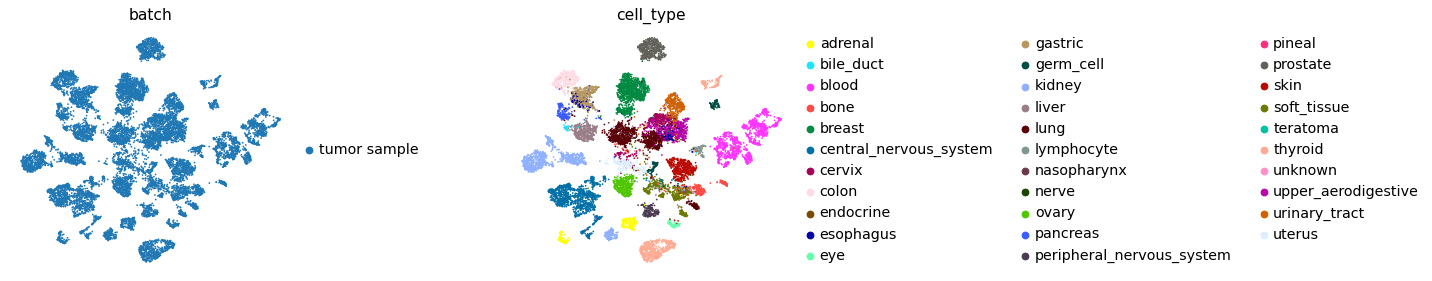

In [37]:
sc.pp.neighbors(adata_latent, n_neighbors=8)
sc.tl.leiden(adata_latent)
sc.tl.umap(adata_latent)
sc.pl.umap(adata_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           )

In [12]:
tcga

AnnData object with n_obs × n_vars = 12236 × 2720
    obs: 'tissue_type', 'disease_type', 'cell_type'

In [157]:
ref_path = 'reference_model/'
trvae.save(ref_path, overwrite=True)

In [151]:
new_trvae = celligner2.TRVAE(
    adata=ccle,
    condition_key=condition_key,
    conditions=target_conditions,
    hidden_layer_sizes=[128, 128],
)



INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 2720 128 1
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 1
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 2720 



In [152]:
new_trvae.train(
    n_epochs=surgery_epochs,
    alpha_epoch_anneal=200,
    early_stopping_kwargs=early_stopping_kwargs,
    weight_decay=0
)

 |██------------------| 14.6%  - val_loss: 4694.9570312500 - val_recon_loss: 4686.0581054688 - val_kl_loss: 24.7190322876 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |███-----------------| 19.6%  - val_loss: 4588.6416015625 - val_recon_loss: 4577.4401855469 - val_kl_loss: 23.0959501266 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 22.2%  - val_loss: 4658.0632324219 - val_recon_loss: 4645.5092773438 - val_kl_loss: 22.8251762390 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 24.8%  - val_loss: 4740.1599121094 - val_recon_loss: 4725.8769531250 - val_kl_loss: 23.2242164612 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 27.0%  - val_loss: 4601.6296386719 - val_recon_loss: 4586.2897949219 - val_kl_loss: 22.8952026367 - val_mmd_loss: 0.0000000000
Stopping early: no improvement of more than 0 nats in 50 epochs
If the early stopping criterion is too strong, please instantiate it with different parameters in the train method.
Saving best state

In [153]:
adata_latent = AnnData(new_trvae.get_latent())
adata_latent.obs['cell_type'] = ccle.obs[cell_type_key].tolist()
adata_latent.obs['batch'] = ccle.obs[condition_key].tolist()

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


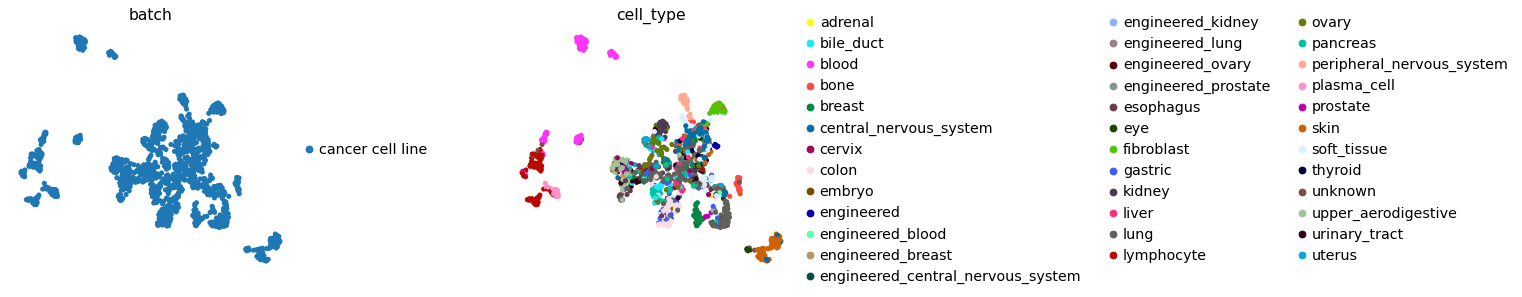

In [154]:
sc.pp.neighbors(adata_latent, n_neighbors=8)
sc.tl.leiden(adata_latent)
sc.tl.umap(adata_latent)
sc.pl.umap(adata_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           )

In [158]:
new_trvae = celligner2.TRVAE.load_query_data(adata=ccle, reference_model=ref_path)

AnnData object with n_obs × n_vars = 1411 × 2720
    obs: 'tissue_type', 'disease_type', 'cell_type', 'trvae_size_factors', 'trvae_labeled'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 2720 128 2
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 2
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 2720 



In [159]:
new_trvae.train(
    n_epochs=surgery_epochs,
    alpha_epoch_anneal=200,
    early_stopping_kwargs=early_stopping_kwargs,
    weight_decay=0
)

 |███-----------------| 18.0%  - val_loss: 4944.6943359375 - val_recon_loss: 4933.3481445312 - val_kl_loss: 25.4971389771 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 20.6%  - val_loss: 4832.8496093750 - val_recon_loss: 4819.8151855469 - val_kl_loss: 25.5580272675 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 23.2%  - val_loss: 4731.2172851562 - val_recon_loss: 4716.3703613281 - val_kl_loss: 25.8205556870 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 26.6%  - val_loss: 4871.2087402344 - val_recon_loss: 4854.1933593750 - val_kl_loss: 25.7809677124 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 29.2%  - val_loss: 4906.3474121094 - val_recon_loss: 4887.8466796875 - val_kl_loss: 25.5185089111 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |██████--------------| 31.8%  - val_loss: 4931.0541992188 - val_recon_loss: 4911.0637207031 - val_kl_loss: 25.3044967651 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |██████--------------

In [170]:
full_latent = sc.AnnData(new_trvae.get_latent(np.vstack([ccle.X,tcga.X]), pd.concat([ccle.obs[condition_key], tcga.obs[condition_key]])))
full_latent.obs['cell_type'] = ccle.obs[cell_type_key].tolist() + tcga.obs[cell_type_key].tolist()
full_latent.obs['batch'] = ccle.obs[condition_key].tolist() + tcga.obs[condition_key].tolist()

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


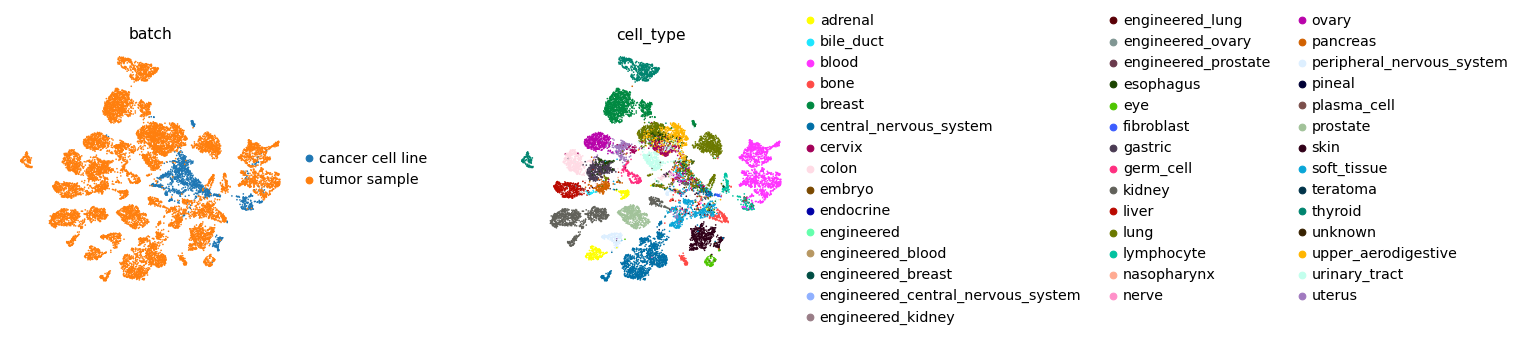

In [171]:
sc.pp.neighbors(full_latent, n_neighbors=8)
sc.tl.leiden(full_latent)
sc.tl.umap(full_latent)
sc.pl.umap(full_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           )

## running it regular mode, with MMD

In [150]:
dat = pd.concat([CCLE_expression, TCGA_expression])

KeyboardInterrupt: 

In [93]:
dat = dat[dat.var().sort_values()[-3000:].index]

In [73]:
set(CCLE_annotation[cell_type_key]) - set(TCGA_annotation[cell_type_key])

{'embryo',
 'engineered',
 'engineered_blood',
 'engineered_breast',
 'engineered_central_nervous_system',
 'engineered_kidney',
 'engineered_lung',
 'engineered_ovary',
 'engineered_prostate',
 'fibroblast',
 'plasma_cell'}

In [83]:
cell_type_alligner = {
 'engineered': 'unknown',
 'engineered_blood': 'blood',
 'nasopharynx': 'upper_aerodigestive',
 'engineered_breast': "breast",
 'engineered_central_nervous_system': "central_nervous_system",
 'engineered_kidney': "kidney",
 'engineered_lung': 'lung',
 'engineered_ovary': "ovary",
 'engineered_prostate': "prostate",
 'plasma_cell': "blood",
 'fibroblast': 'soft_tissue',
 'nerve': "peripheral_nervous_system"
 np.nan: "unknown",
 "adrenal_cortex": "adrenal",
 "colorectal": "colon",
 'thymus': 'thyroid'
}

In [149]:
set(TCGA_annotation[cell_type_key]) - set(CCLE_annotation[cell_type_key])

{'endocrine', 'germ_cell', 'nasopharynx', 'nerve', 'pineal', 'teratoma'}

In [96]:
ann = pd.concat([CCLE_annotation, TCGA_annotation])
loc = ~ann[cell_type_key].isin(['embryo', "germ_cell", 'endocrine', 'teratoma','pineal'])
ann = ann.loc[loc]
dat = dat.loc[loc]
loc = ~(ann.tissue_type.isna() | ann.tissue_type.isin([None, 'unknown']))
data = AnnData(dat.loc[loc], ann.loc[loc])

In [145]:
condition_key = 'cell_type'
cell_type_key = 'tissue_type'

trvae_epochs = 200

early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss",
    "threshold": 0,
    "patience": 20,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

In [146]:
trvae = celligner2.TRVAE(
    adata=data,
    condition_key=condition_key,
    hidden_layer_sizes=[256, 128],
    use_mmd = True,
    latent_dim=16,
)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 3000 256 2
	Hidden Layer 1 in/out: 256 128
	Mean/Var Layer in/out: 128 16
Decoder Architecture:
	First Layer in, out and cond:  16 128 2
	Hidden Layer 1 in/out: 128 256
	Output Layer in/out:  256 3000 



In [148]:
trvae.train(
    n_epochs=trvae_epochs,
    alpha_epoch_anneal=200,
    early_stopping_kwargs=early_stopping_kwargs,
)

 |███-----------------| 18.5%  - val_loss: 4758.8045099432 - val_recon_loss: 4749.3077503551 - val_kl_loss: 45.2910294966 - val_mmd_loss: 1.3444021398

KeyboardInterrupt: 

In [ ]:
full_latent = sc.AnnData(trvae.get_latent(data.X, data.obs[condition_key]))
full_latent.obs['cell_type'] = data.obs[cell_type_key].tolist()
full_latent.obs['batch'] = data.obs[condition_key].tolist()

In [ ]:
sc.settings.set_figure_params(dpi=150, frameon=False)
sc.set_figure_params(dpi=150)
sc.set_figure_params(figsize=(15, 15))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [ ]:
sc.pp.neighbors(full_latent, n_neighbors=8)
sc.tl.leiden(full_latent)

In [ ]:
sc.tl.umap(full_latent, 
           n_components=2,
          min_dist=0.5,
          alpha=1,
          spread=1,
          random_state=None)

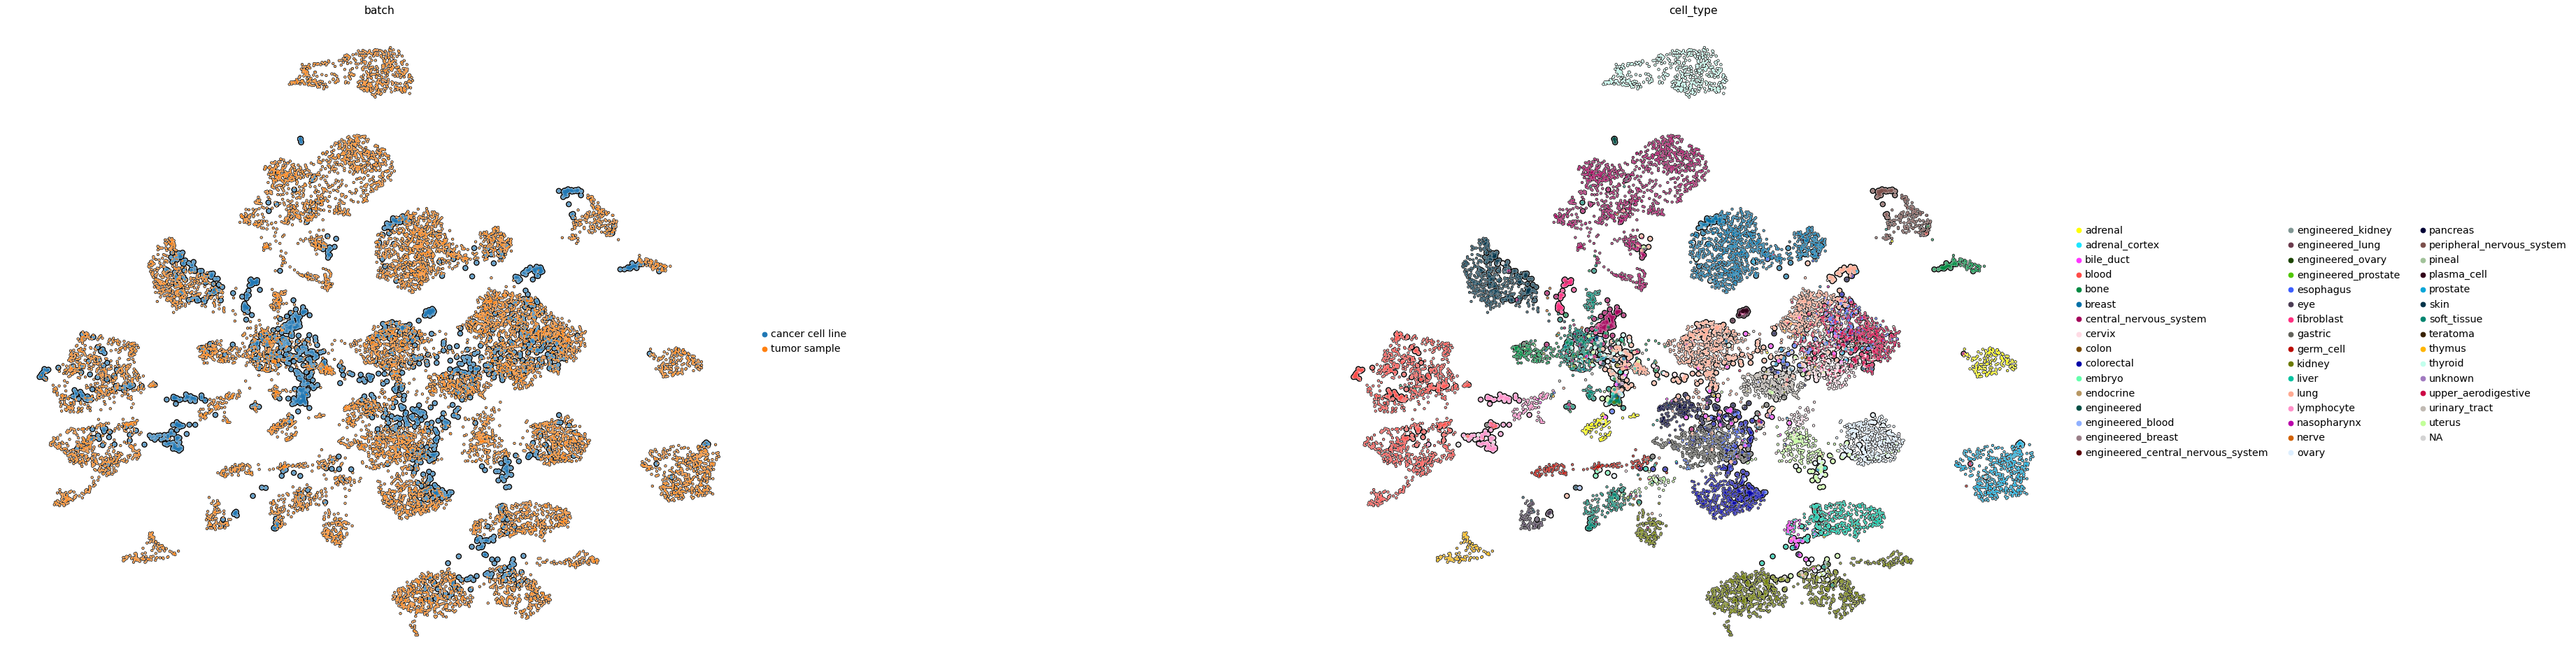

In [69]:
sc.pl.umap(full_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           projection="2d",
           add_outline=True,
           size=[80]*len(ann[ann[condition_key]=='cancer cell line']) + [20]*len(ann[ann[condition_key]=='tumor sample'])
           )

## other trials

In [109]:
condition_key = 'cell_type'
cell_type_key = 'tissue_type'

trvae_epochs = 150

early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss",
    "threshold": 0,
    "patience": 15,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

In [138]:
trvae = celligner2.TRVAE(
    adata=data,
    condition_key=condition_key,
    hidden_layer_sizes=[256, 128],
    use_mmd = True,
    beta=100,
    latent_dim=16,
)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 3000 256 2
	Hidden Layer 1 in/out: 256 128
	Mean/Var Layer in/out: 128 16
Decoder Architecture:
	First Layer in, out and cond:  16 128 2
	Hidden Layer 1 in/out: 128 256
	Output Layer in/out:  256 3000 



In [140]:
trvae.train(
    n_epochs=trvae_epochs,
    alpha_epoch_anneal=200,
    alpha_kl=0.001,
    early_stopping_kwargs=early_stopping_kwargs,
    weight_decay=0.
)

 |█████████████████---| 88.0%  - val_loss: 4347.1778675426 - val_recon_loss: 4277.0377308239 - val_kl_loss: 66.3117030751 - val_mmd_loss: 70.09667552608
ADJUSTED LR
 |████████████████████| 100.0%  - val_loss: 4335.8326526989 - val_recon_loss: 4264.6768909801 - val_kl_loss: 66.2961203835 - val_mmd_loss: 71.1064078591
Saving best state of network...
Best State was in Epoch 148


In [141]:
full_latent2 = sc.AnnData(trvae.get_latent(data.X, data.obs[condition_key]))
full_latent2.obs['cell_type'] = data.obs[cell_type_key].tolist()
full_latent2.obs['batch'] = data.obs[condition_key].tolist()

In [142]:
sc.pp.neighbors(full_latent2, n_neighbors=8)
sc.tl.leiden(full_latent2)

In [143]:
sc.tl.umap(full_latent2, 
          n_components=2,
          min_dist=0.5,
          alpha=1,
          spread=1,
          random_state=None)

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


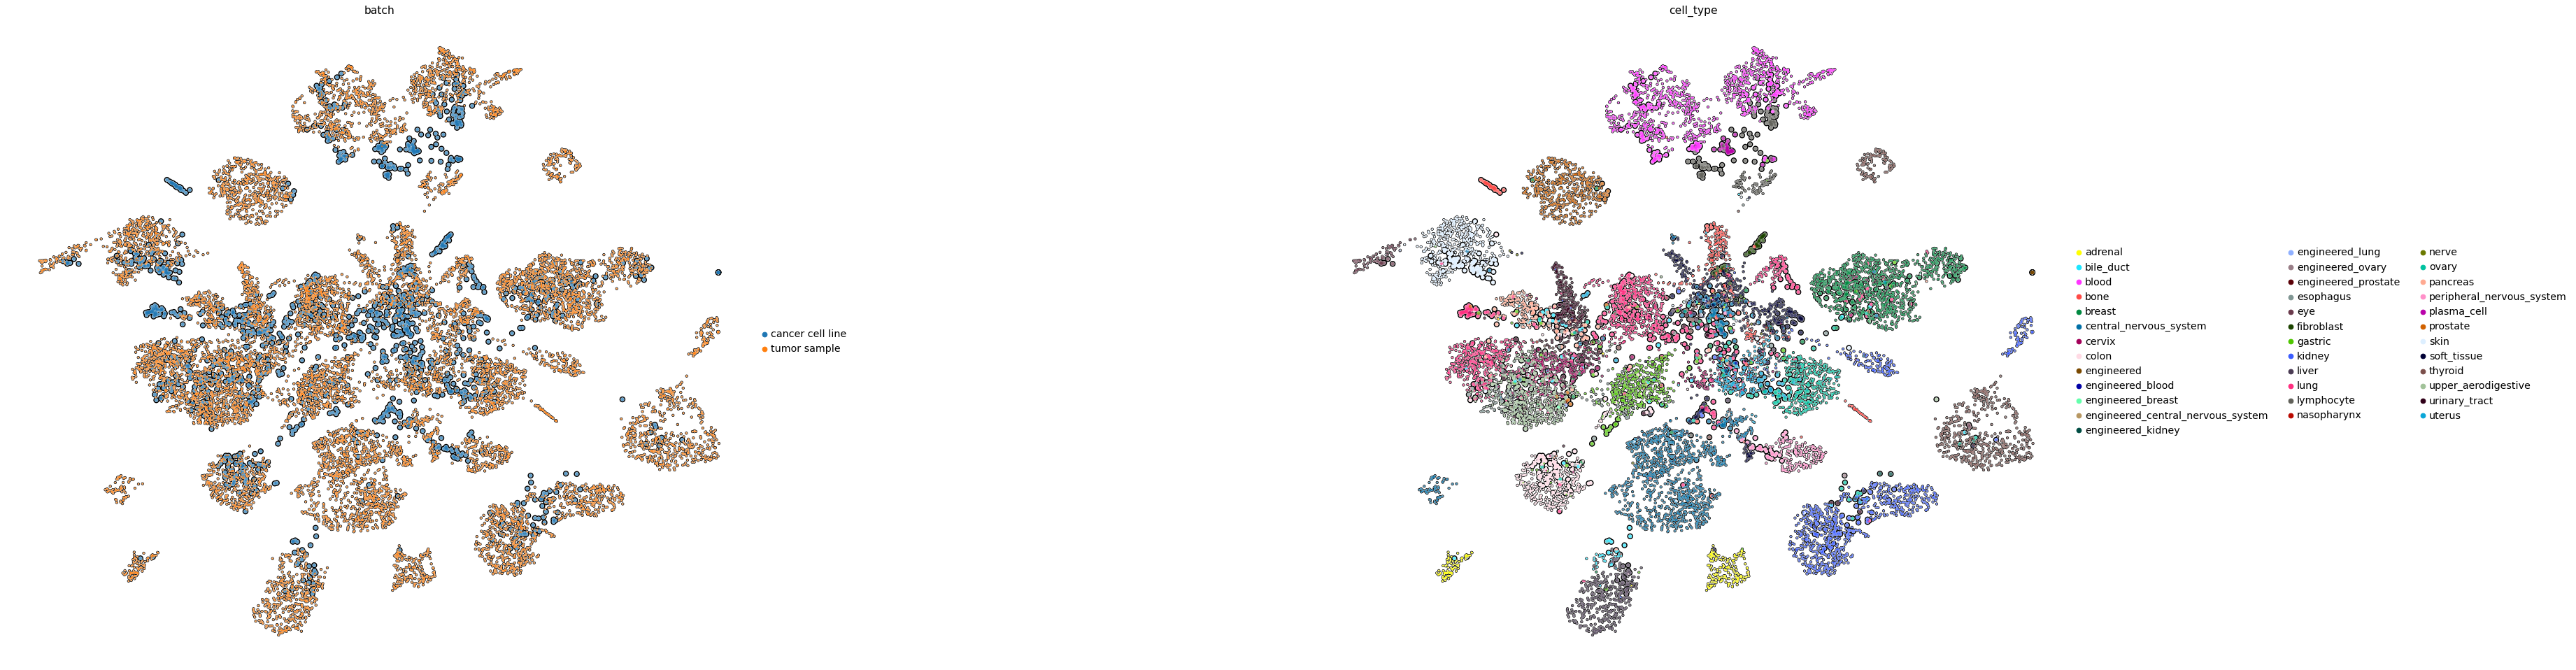

In [144]:
#ann = ann.loc[loc]
sc.pl.umap(full_latent2,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           projection="2d",
           add_outline=True,
           size=[80]*len(ann[ann[condition_key]=='cancer cell line']) + [20]*len(ann[ann[condition_key]=='tumor sample'])
           )

## add many many more datasets

In [ ]:
from genepy.utils import helper as h

# to comment in your case
from taigapy import TaigaClient
tc = TaigaClient()

from celligner2.dataset import anndata
import pandas as pd
# to comment in your case
from depmapomics import tracker as track
#autoreload
%load_ext autoreload
%autoreload 2
#output
from bokeh.plotting import output_notebook
output_notebook()
from anndata import AnnData

## make semi supervised

ACH-001113         cancer cell line
ACH-001289         cancer cell line
ACH-001339         cancer cell line
ACH-001538         cancer cell line
ACH-000242         cancer cell line
                         ...       
TCGA-95-7947-01        tumor sample
TCGA-VQ-AA6F-01        tumor sample
TCGA-BR-8588-01        tumor sample
TCGA-24-2254-01        tumor sample
TCGA-DD-A115-01        tumor sample
Name: cell_type, Length: 13647, dtype: object